<a href="https://colab.research.google.com/github/khyati2509/ML-PROJECTS-/blob/main/Mall_Clustering_Project_KJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [193]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [194]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [195]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


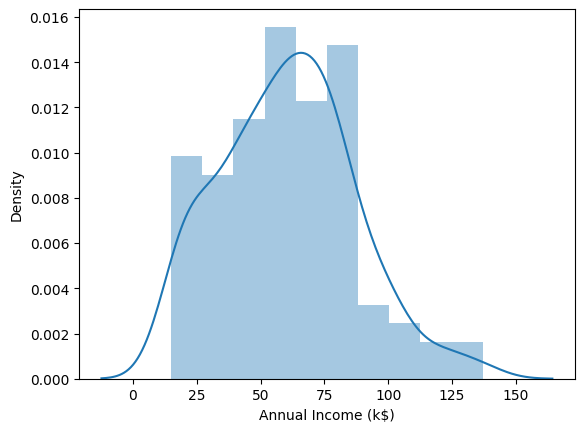

In [196]:
sns.distplot(df['Annual Income (k$)']);

In [197]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

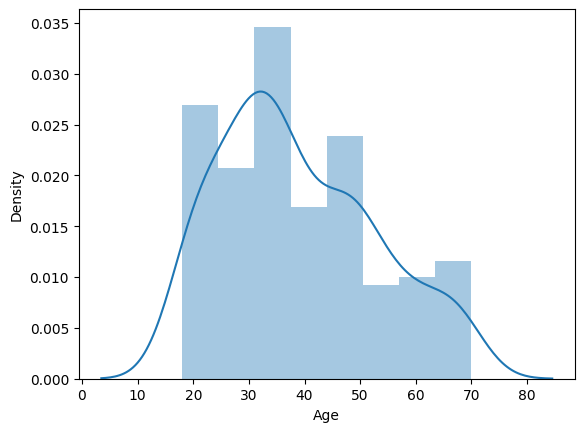

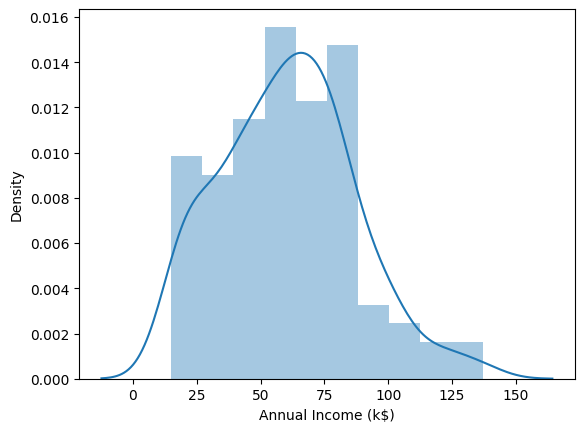

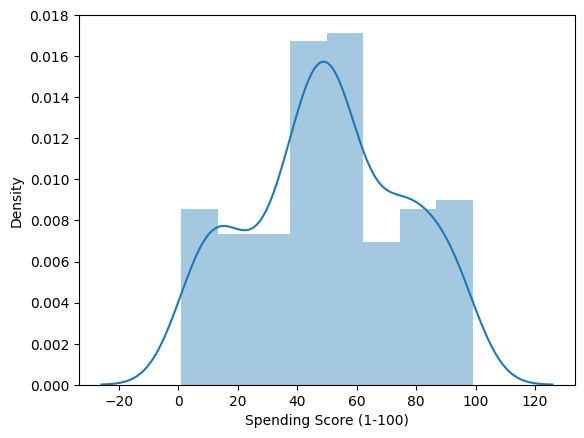

In [198]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

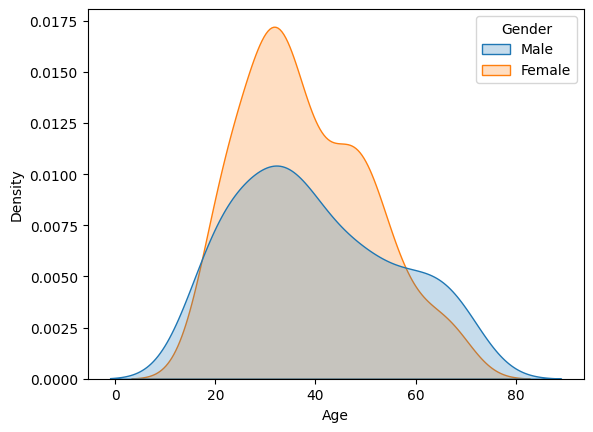

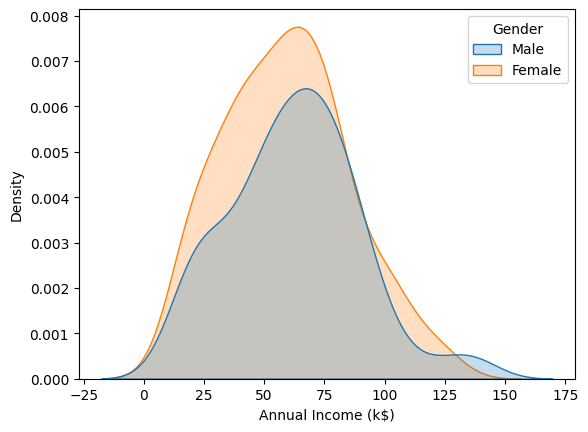

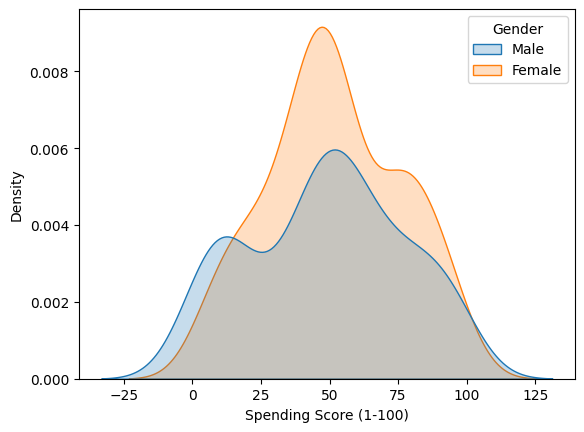

In [199]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, shade=True, hue='Gender')

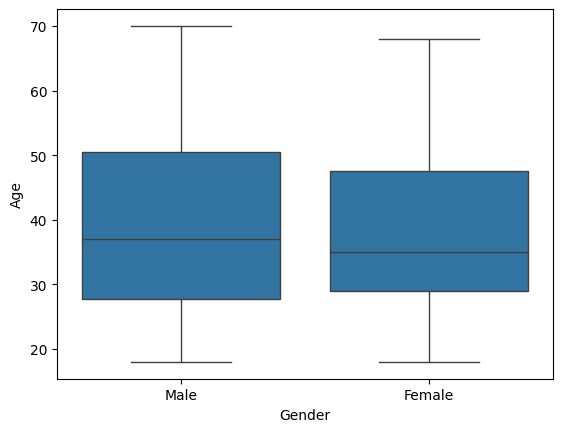

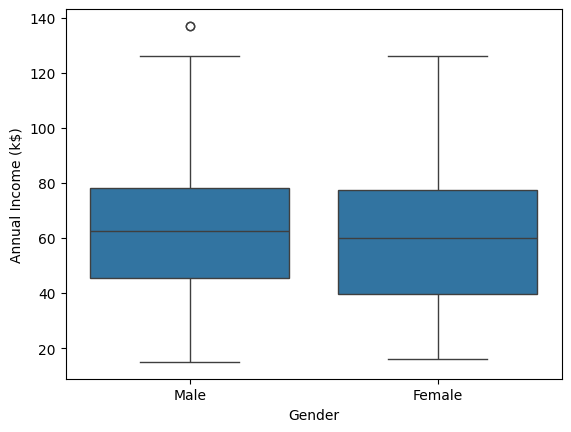

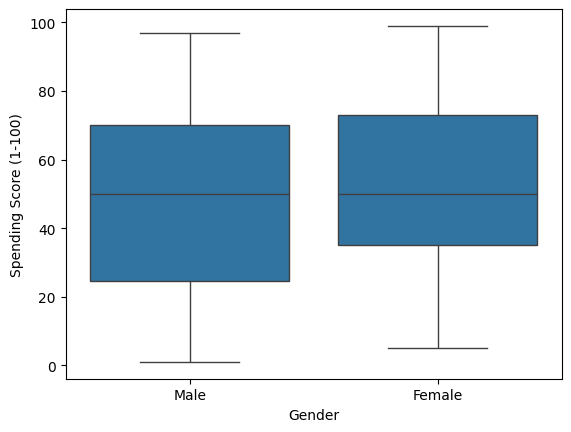

In [200]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [201]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

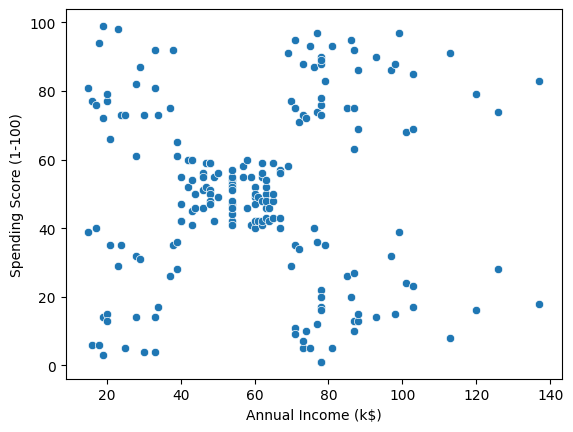

In [202]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' )

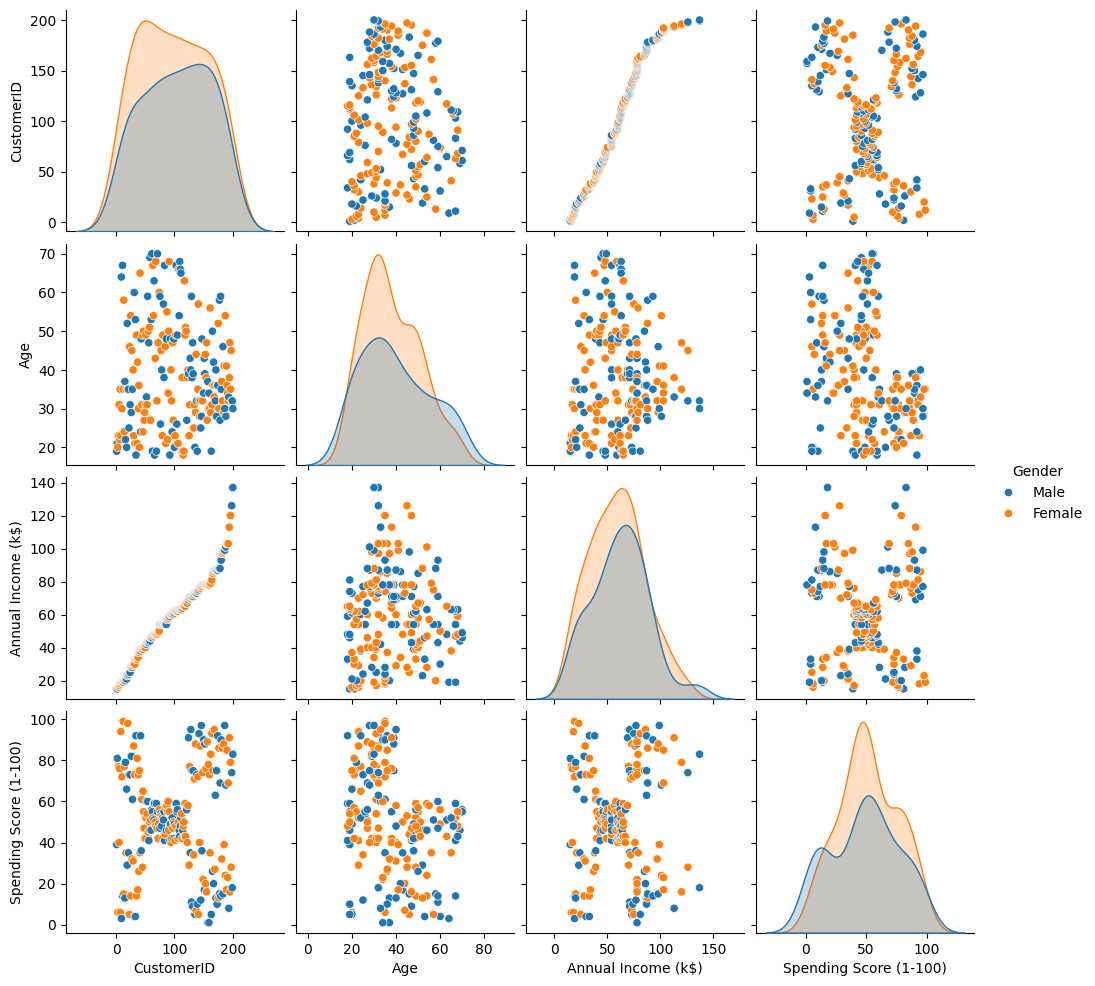

In [203]:
#df=df.drop('CustomerID',axis=1)
sns.pairplot(df,hue='Gender')

In [204]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [205]:
df_encoded.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.149771,-0.616854,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.032273,-0.086405,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.216304,-0.603528,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.007563,-0.289219,-0.058109
Income Cluster,0.149771,-0.032273,0.216304,0.007563,1.000000,0.180927,0.022043
Spending and Income Cluster,-0.616854,-0.086405,-0.603528,-0.289219,0.180927,1.000000,-0.015972
Gender_Male,0.057400,0.060867,0.056410,-0.058109,0.022043,-0.015972,1.000000


<Axes: >

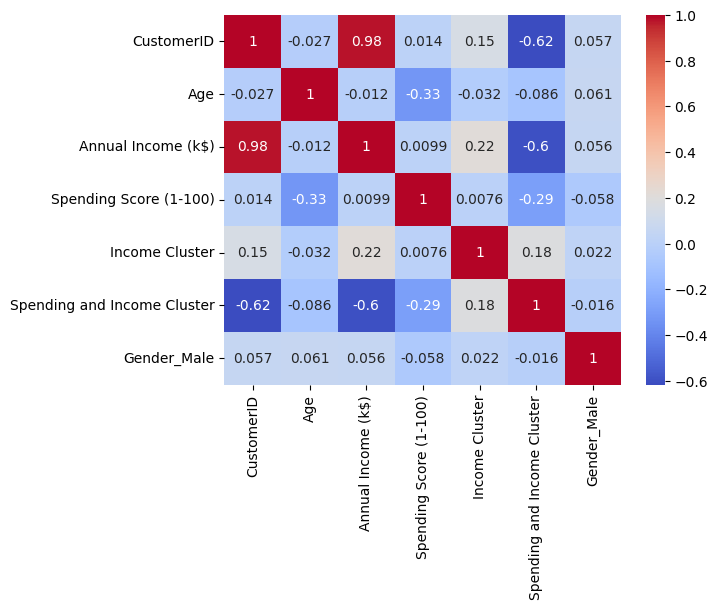

In [206]:
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [207]:
clustering1 = KMeans(n_clusters=3)

In [208]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [209]:
clustering1.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [210]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [211]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,104
2,74
1,22


In [212]:
clustering1.inertia_

24361.259213759215

In [213]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [214]:
intertia_scores

[137277.2800000002,
 48968.020808323316,
 23528.152173913048,
 14647.235170393054,
 8667.679614837503,
 7161.34028242289,
 3955.2566544566516,
 3526.3583638583614,
 2455.8320512820515,
 1929.1822344322363]

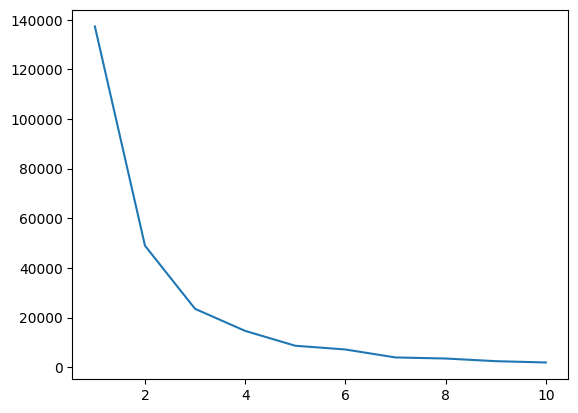

In [215]:
plt.plot(range(1,11),intertia_scores)

In [216]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [217]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.663462,69.750000,49.798077
1,37.545455,108.181818,52.000000
2,39.500000,33.486486,50.229730


In [218]:
#Bivariate Clustering

In [219]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0


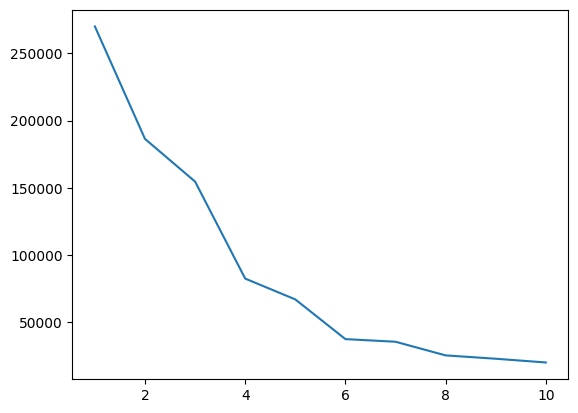

In [220]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [221]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

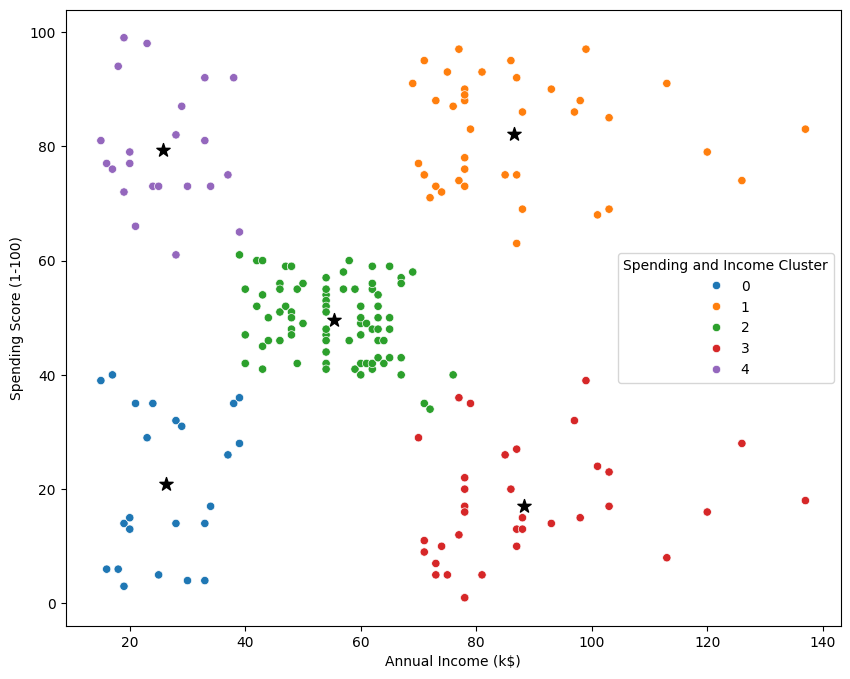

In [222]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [223]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.457143,0.542857
4,0.590909,0.409091


In [224]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


In [225]:
#mulivariate clustering
from sklearn.preprocessing import StandardScaler

In [226]:
scale = StandardScaler()

In [227]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0


In [228]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,2,0,True
1,2,21,15,81,2,4,True
2,3,20,16,6,2,0,False
3,4,23,16,77,2,4,False
4,5,31,17,40,2,0,False


In [229]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [230]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [231]:
dff = scale.fit_transform(dff)

In [232]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


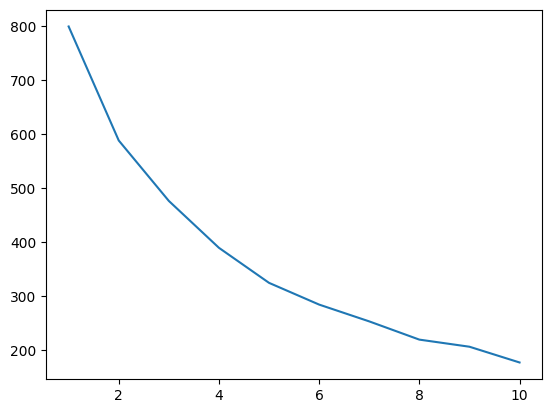

In [233]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [234]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,2,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,1,3
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,3


In [235]:
df.to_csv('Clustering.csv')